In [2]:
import sys
import os
root_dir = os.getcwd()
print(root_dir)
sys.path.insert(1, root_dir)
sys.path.append('../modules/')


/home/sohan/Desktop/Final_Assesment/Ensemble Strategies


In [73]:
import numpy as np
import pandas as pd
import indicators as ind
import ensemble_trading_strategy as ets
import matplotlib.pyplot as plt
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading Stock Price

In [74]:
X = pd.read_csv('../data/dataset/combined_stocks_data_X.csv')
y = pd.read_csv('../data/dataset/combined_stocks_data_y.csv')

In [75]:
X.head()

,open,high,low,close,volume,sma_5,sma_10,ema_5,ema_10,MACD_12_26_9,...,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,cci_16,atr,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,wpr
0,42.950001,43.487499,42.927502,43.125000,123967600.0,43.042001,41.67050,42.727659,42.218500,-0.224005,...,43.370730,1.527484,0.626243,96.255793,0.991681,87.740700,89.323931,94.288841,95.455570,-9.438597
1,43.417500,43.912498,43.384998,43.875000,135249600.0,43.167500,42.17925,43.110106,42.519682,-0.072161,...,43.920088,3.486826,0.970045,108.381565,0.978919,91.571601,88.986021,95.980406,94.950683,-0.590295
2,44.087502,44.847500,44.052502,44.742500,152648800.0,43.494501,42.74325,43.654237,42.923831,0.116829,...,44.950623,6.695660,0.928535,124.071017,0.978518,96.176764,91.829688,98.892672,96.387307,-1.440817
3,44.775002,45.119999,44.540001,44.597500,155712400.0,43.821500,43.13525,43.968658,43.228134,0.252001,...,45.383372,7.128335,0.748420,112.052327,0.953611,97.019174,94.922513,99.091350,97.988143,-6.911366
4,44.814999,45.154999,44.512501,44.529999,151128400.0,44.174000,43.47975,44.155772,43.464837,0.349647,...,45.380344,5.461782,0.647553,98.700140,0.934166,94.472905,95.889614,97.420604,98.468209,-8.229101


In [76]:
y.head()

,0
0,0
1,1
2,1
3,1
4,0


In [57]:
X.columns

Index(['open', 'high', 'low', 'close', 'volume', 'sma_5', 'sma_10', 'ema_5',
       'ema_10', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14',
       'DMP_14', 'DMN_14', 'rsi_14', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0',
       'BBB_5_2.0', 'BBP_5_2.0', 'cci_16', 'atr', 'STOCHk_14_3_3',
       'STOCHd_14_3_3', 'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'wpr'],
      dtype='object')

In [77]:
y.value_counts()

0 
 0    29669
 1    16025
-1    14188
Name: count, dtype: int64

In [78]:
y.isna().sum()

0    0
dtype: int64

In [61]:
X.isna().sum()

open                   0
high                   0
low                    0
close                  0
volume                 0
sma_5                  0
sma_10                 0
ema_5                  0
ema_10                 0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ADX_14                 0
DMP_14                 0
DMN_14                 0
rsi_14                 0
BBL_5_2.0              0
BBM_5_2.0              0
BBU_5_2.0              0
BBB_5_2.0              0
BBP_5_2.0              0
cci_16                 0
atr                    0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
wpr                    0
dtype: int64

## Data Preprocessing

In [79]:
X_scaled = ets.data_preprocess(X)
y = np.array(y)

In [80]:
X_scaled[:3]

array([[-0.81364594, -0.81360832, -0.808398  , -0.81191543,  4.82891792,
        -0.81278564, -0.82738336, -0.81635344, -0.82192619, -0.10833265,
         0.46830002, -0.267369  ,  0.51364133,  0.28065406,  0.57218829,
         0.4559768 , -0.80240733, -0.81278564, -0.82133766, -0.85376638,
         0.36037033,  0.77098959, -0.71702089,  1.17302664,  1.26526377,
         1.296519  ,  1.38319733,  1.18134619],
       [-0.80864001, -0.80911201, -0.80343148, -0.80388092,  5.30623295,
        -0.81144035, -0.8219259 , -0.81225275, -0.81869367, -0.06709107,
         0.48230721, -0.22803762,  0.28684269,  0.50959736,  0.35117089,
         0.78077768, -0.80570788, -0.81144035, -0.81563418, -0.50727517,
         1.55233171,  0.88179395, -0.72108589,  1.3081579 ,  1.25298599,
         1.34862282,  1.36704957,  1.47214563],
       [-0.80146569, -0.79922011, -0.79618514, -0.79458766,  6.04235241,
        -0.80793505, -0.81587576, -0.80641845, -0.81435602, -0.01576021,
         0.51995383, -0.1856

In [71]:
X_new = X_scaled[:-1]
X_last = X_scaled[-1]
print(X_scaled.shape, X_new.shape, X_last.shape)

(1224, 28) (1223, 28) (28,)


In [72]:
X_last

array([ 0.62644033,  0.62562006,  0.63901362,  0.65799325, -0.71235613,
        0.65156218,  0.69752547,  0.66285931,  0.71305789, -2.19587015,
       -1.11864554, -1.98196882, -0.88620052, -1.22776399,  1.0907552 ,
       -1.40741672,  0.6557351 ,  0.65156218,  0.64656747, -0.05034833,
        0.04949943, -1.00772812,  1.16723558, -1.67841379, -1.82845652,
       -0.87154319, -1.25990264, -1.38776469])

## Random Forest Classifier

Accuracy: 0.8288023512123439
Precision: 0.8291344796540717
Recall: 0.8288023512123439
F1 Score: 0.82867217026749


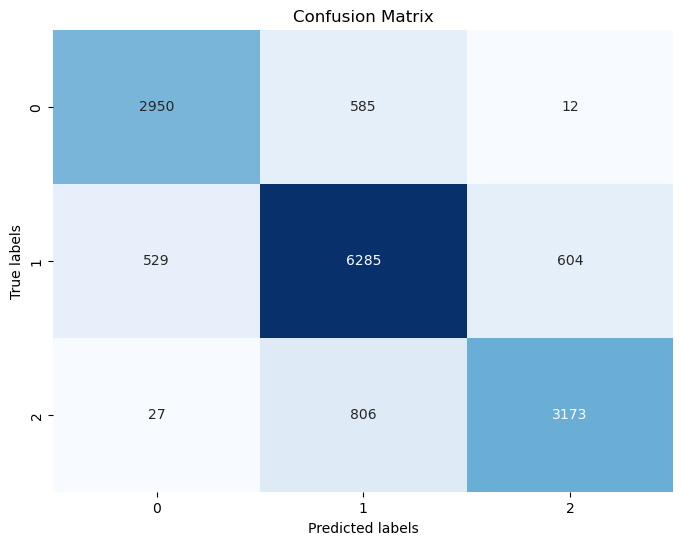

In [81]:
ets.train_rfc_model(X_scaled, y, signal_type='returns')

## Bagging Classifier with LR Estimator

Accuracy: 0.8122369915169327
Precision: 0.8130828731083805
Recall: 0.8122369915169327
F1 Score: 0.812010455664044


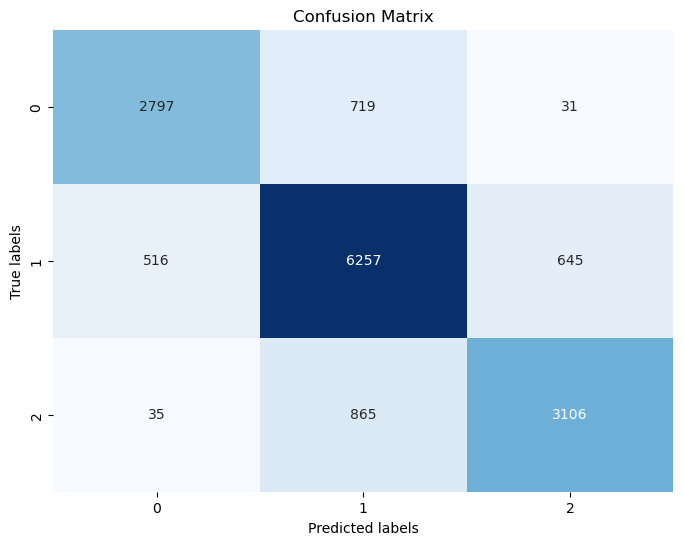

In [82]:
ets.train_bag_model_with_lr(X_scaled, y, signal_type = 'returns')

## Bagging Classifier with DTC estimator

Accuracy: 0.7843137254901961
Precision: 0.7839952428134129
Recall: 0.7843137254901961
F1 Score: 0.7841059562016762


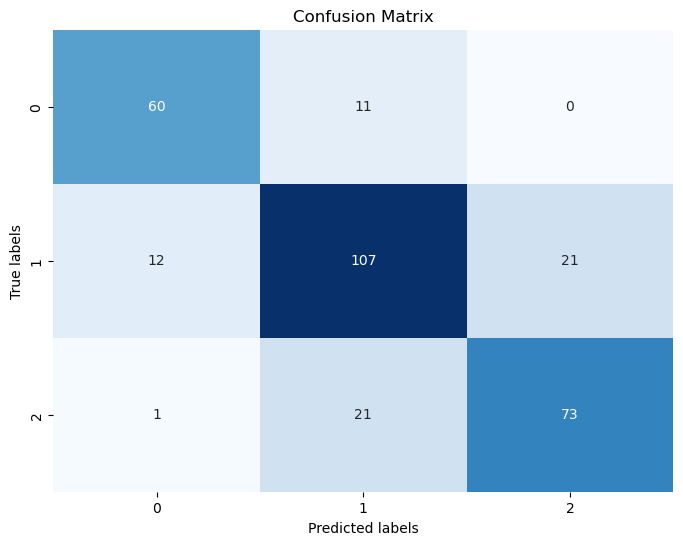

In [66]:
ets.train_bag_model_with_dtc(X_scaled, y, signal_type = 'returns')